In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

movies = pd.read_csv('data/movies1.csv', sep = ';')
movies.head()

,cod,title,year,type
0,1,Toy Story,(1995),Animation|Children's|Comedy
1,2,Jumanji,(1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men,(1995),Comedy|Romance
3,4,Waiting to Exhale,(1995),Comedy|Drama
4,5,Father of the Bride Part II,(1995),Comedy


In [2]:
movies.shape

(3883, 4)

In [3]:
movies.ndim

2

In [4]:
movies.columns

Index(['cod', 'title', 'year', 'type'], dtype='object')

In [5]:
movies.dtypes

cod       int64
title    object
year     object
type     object
dtype: object

In [6]:
movies["year"]=movies["year"].apply(lambda x: x[1:5])
movies["year"] = pd.to_numeric(movies["year"])
movies

,cod,title,year,type
0,1,Toy Story,1995,Animation|Children's|Comedy
1,2,Jumanji,1995,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,1995,Comedy|Romance
3,4,Waiting to Exhale,1995,Comedy|Drama
4,5,Father of the Bride Part II,1995,Comedy
...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy
3879,3949,Requiem for a Dream,2000,Drama
3880,3950,Tigerland,2000,Drama
3881,3951,Two Family House,2000,Drama


In [7]:
#add column Decada
movies["decada"]=movies["year"].apply(lambda x: (x-1900)//10*10 if x<2000 else 2000)
movies

,cod,title,year,type,decada
0,1,Toy Story,1995,Animation|Children's|Comedy,90
1,2,Jumanji,1995,Adventure|Children's|Fantasy,90
2,3,Grumpier Old Men,1995,Comedy|Romance,90
3,4,Waiting to Exhale,1995,Comedy|Drama,90
4,5,Father of the Bride Part II,1995,Comedy,90
...,...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy,2000
3879,3949,Requiem for a Dream,2000,Drama,2000
3880,3950,Tigerland,2000,Drama,2000
3881,3951,Two Family House,2000,Drama,2000


In [8]:
#get film genre
movies["type"]=movies["type"]+"|"
s=movies["type"].to_list()
   
listToStr = ''.join(map(str, s))
ss=listToStr.split("|")
typesMovie = pd.Series(ss) 
typesMovie.unique()

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western', ''], dtype=object)

In [9]:
#genre columns added
for i in typesMovie:
   movies[i]=movies["type"].apply(lambda x: 1 if str(x).count(i)>0 else 0)
movies 

,cod,title,year,type,decada,Animation,Children's,Comedy,Adventure,Fantasy,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,
0,1,Toy Story,1995,Animation|Children's|Comedy|,90,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,Jumanji,1995,Adventure|Children's|Fantasy|,90,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,3,Grumpier Old Men,1995,Comedy|Romance|,90,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,Waiting to Exhale,1995,Comedy|Drama|,90,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,Father of the Bride Part II,1995,Comedy|,90,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy|,2000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3879,3949,Requiem for a Dream,2000,Drama|,2000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3880,3950,Tigerland,2000,Drama|,2000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3881,3951,Two Family House,2000,Drama|,2000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
mov_type=movies[['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western']].sum()
mov_type

Animation       105
Children's      251
Comedy         1200
Adventure       283
Fantasy          68
Romance         471
Drama          1603
Action          503
Crime           211
Thriller        492
Horror          343
Sci-Fi          276
Documentary     127
War             143
Musical         114
Mystery         106
Film-Noir        44
Western          68
dtype: int64

In [355]:
moviesG=movies.groupby(["decada"]).agg({"title":"count","Drama":"sum"})
moviesG.reset_index(inplace=True)
moviesG

,decada,title,Drama
0,10,3,2
1,20,34,14
2,30,77,26
3,40,126,44
4,50,168,62
5,60,191,69
6,70,247,84
7,80,598,211
8,90,2283,1036
9,2000,156,55


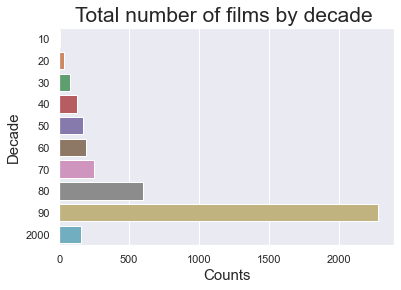

In [366]:
y=moviesG["decada"]
ax=sns.barplot(x='title', y=y, data=moviesG, orient="h")
ax.set_title('Total number of films by decade ', fontsize = 21)
ax.set_ylabel('Decade',fontsize = 15)
ax.set_xlabel('Counts',fontsize = 15)
plt.show()

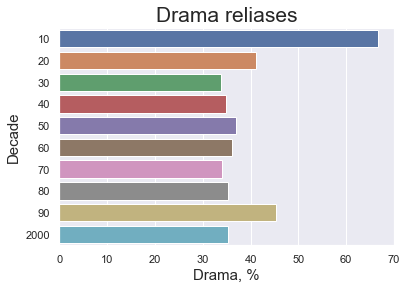

In [368]:
y = moviesG["decada"]
x1=moviesG["Drama"]
x2=moviesG["title"]
ax=sns.barplot(x=x1*100/x2, y=y, data=moviesG, orient='h')
ax.set_title('Drama reliases', fontsize = 21)
ax.set_ylabel('Decade',fontsize = 15)
ax.set_xlabel('Drama, %',fontsize = 15)
plt.show()


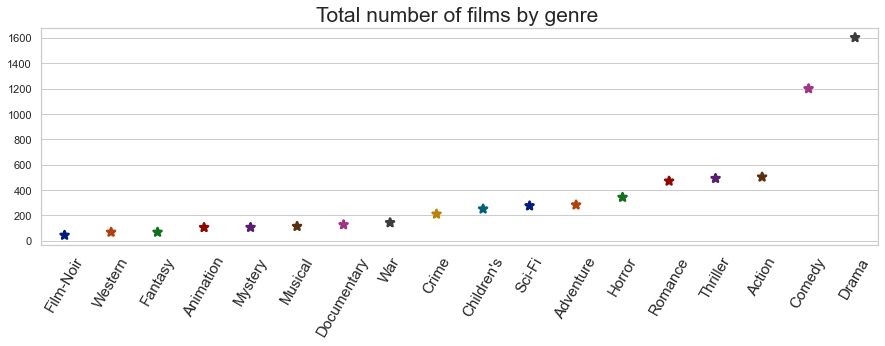

In [400]:
fig, ax = plt.subplots(figsize=(15,4))
ss=movies.sum()[5:23].sort_values()
x=ss.index
y=ss.values
#sns.stripplot(x, y,size=8)
sns.set_style("whitegrid")
sns.pointplot(x, y, 
              dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="*", scale=1.25, ci=None, rotation=30)
ax.set_title('Total number of films by genre ', fontsize = 21)
#ax.set_xlabel('Genre of films',fontsize = 15)

labels = ax.get_xticklabels() # get x labels
ax.set_xticklabels(labels, rotation=60,fontsize = 15) 
plt.show()

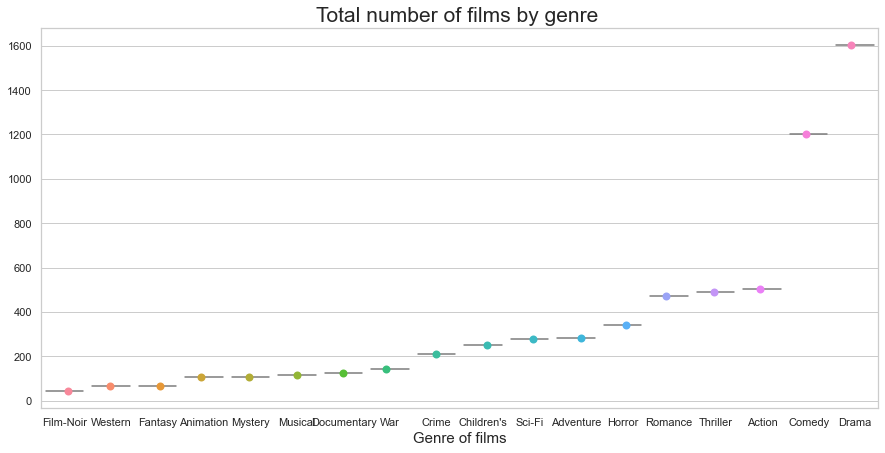

In [370]:
fig, ax = plt.subplots(figsize=(15,7))
#x=pd.Series(movies.columns[5:23])
ss=movies.sum()[5:23].sort_values()
x=ss.index
y=ss.values

ax = sns.violinplot(x, y,inner=None, color=".8")

ax = sns.stripplot(x, y, size=8)
ax.set_title('Total number of films by genre ', fontsize = 21)
ax.set_xlabel('Genre of films',fontsize = 15)
plt.show()

In [338]:
moviesDecada=movies.groupby(["decada"]).sum().reset_index()
moviesDecada.drop(columns=["cod","year"], axis=1,inplace=True)
moviesDecada

,decada,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,
0,10,0,0,1,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,3
1,20,0,0,13,1,0,2,14,1,1,2,1,1,0,2,1,0,0,0,34
2,30,2,4,23,6,0,15,26,3,4,9,7,1,1,5,11,5,1,1,77
3,40,11,13,22,6,0,14,44,2,8,17,14,1,0,11,14,9,17,7,126
4,50,5,10,25,13,4,18,62,10,7,16,20,32,1,13,17,7,9,7,168
5,60,5,20,41,16,2,10,69,17,6,24,26,13,1,13,19,5,2,16,191
6,70,8,25,63,26,4,8,84,41,17,22,35,31,2,11,9,6,1,15,247
7,80,14,31,200,78,24,54,211,110,21,55,112,66,9,31,12,12,4,3,598
8,90,52,139,743,130,33,333,1036,299,139,322,120,121,105,55,30,61,10,19,2283
9,2000,8,9,69,6,1,17,55,19,8,25,8,10,8,2,1,1,0,0,156


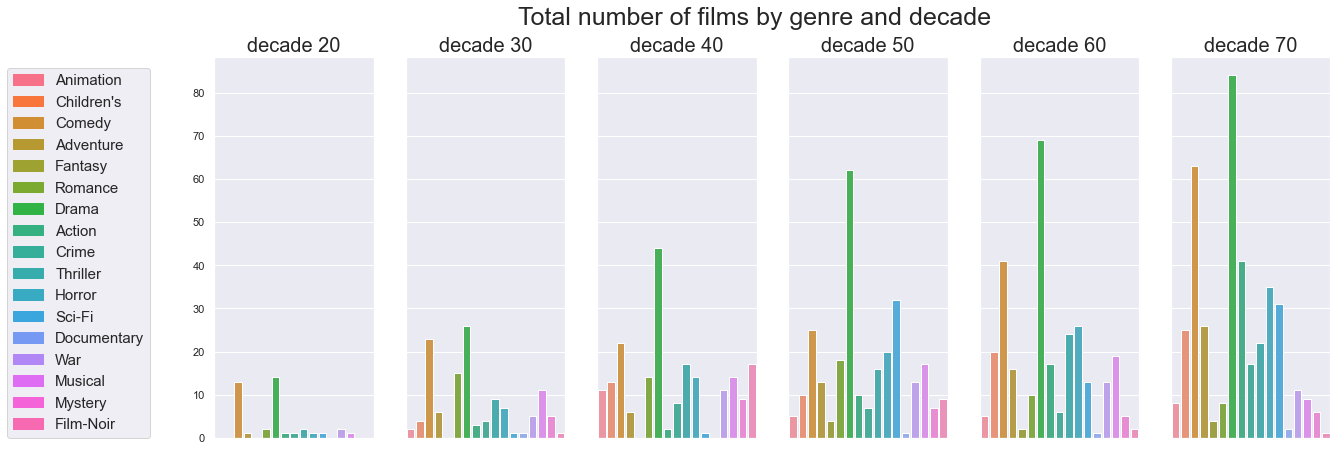

In [383]:
from matplotlib.patches import Patch

fig, axes = plt.subplots(1, 6, figsize=(20, 7), sharey=True)
fig.suptitle('Total number of films by genre and decade',fontsize=25)

x=moviesDecada.columns[1:18]
dec=moviesDecada["decada"]
i=0
k=0
for decada in dec[1:7]:
    y=moviesDecada[moviesDecada["decada"]==decada].sum()[1:18].values
    sns.barplot(ax=axes[i], x=x, y=y)
    axes[i].set_title("decade "+ str(decada),fontsize=20)
    axes[i].set(xticklabels=[])
    
    i+=1
sns.set(font_scale = 1)    
colors = sns.color_palette('husl', n_colors=len(x))
cmap = dict(zip(x, colors))
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(handles=patches, loc='lower left', bbox_to_anchor=(-7.3, 0), borderaxespad=0, fontsize=15, mode="None")

plt.show()